## Qualitative Visualizations using Python

#### Categorical Data: Bar Chart

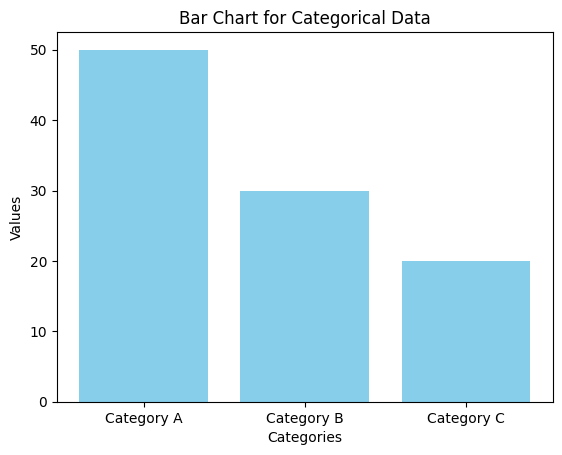

In [1]:
import matplotlib.pyplot as plt

# Example data
categories = ['Category A', 'Category B', 'Category C']
values = [50, 30, 20]

# Bar chart
plt.bar(categories, values, color='skyblue')
plt.title('Bar Chart for Categorical Data')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


#### Thematic Data: Heatmap

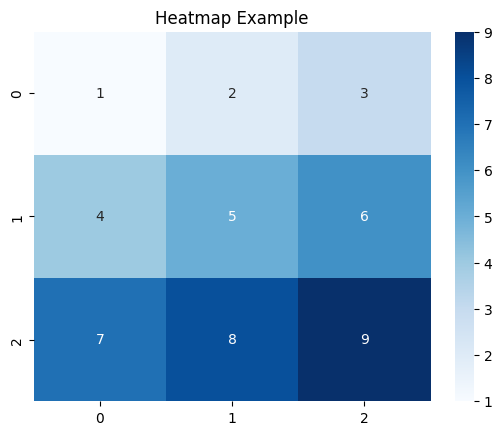

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# Heatmap
sns.heatmap(data, annot=True, cmap='Blues')
plt.title('Heatmap Example')
plt.show()


#### Textual Data: Word Cloud

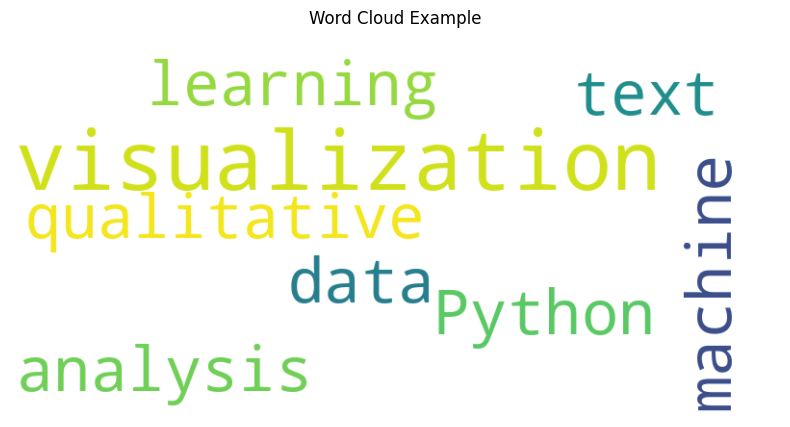

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example text data
text = "Python visualization data analysis machine learning qualitative text visualization"

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Example')
plt.show()


#### Sentiment Analysis with Text Clustering

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example text data
documents = [
    "AI is transforming technology.",
    "Data visualization is key to insights.",
    "Python is a versatile programming language.",
    "Machine learning drives AI forward."
]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Visualize clusters
clusters = kmeans.labels_
for i, doc in enumerate(documents):
    print(f"Cluster {clusters[i]}: {doc}")


Cluster 1: AI is transforming technology.
Cluster 0: Data visualization is key to insights.
Cluster 0: Python is a versatile programming language.
Cluster 1: Machine learning drives AI forward.


#### Treemap for Hierarchical Categories

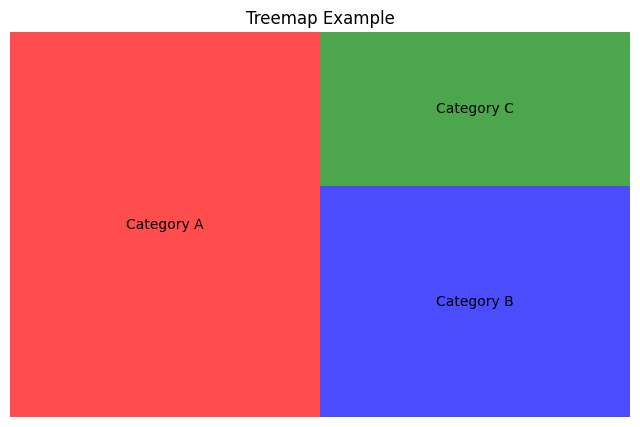

In [5]:
import squarify # install squartify using %pip install squarify
import matplotlib.pyplot as plt

# Example data
sizes = [500, 300, 200]
labels = ['Category A', 'Category B', 'Category C']

# Treemap
plt.figure(figsize=(8, 5))
squarify.plot(sizes=sizes, label=labels, color=['red', 'blue', 'green'], alpha=0.7)
plt.title('Treemap Example')
plt.axis('off')
plt.show()

## Thematic Coding in Research

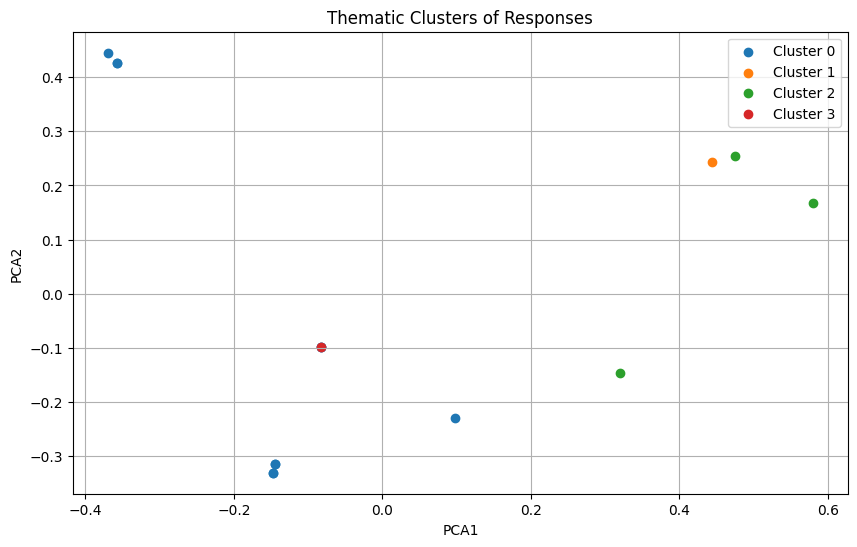

The dataset with clusters and themes has been saved to 'thematic_clustering_results.csv'.
    Participant_ID                                           Response  \
0                1       The support group helped me feel less alone.   
1                2  I found it hard to express my feelings during ...   
2                3  The activities were engaging and encouraged pa...   
3                4        I did not feel understood by the counselor.   
4                5  Sharing my story was a powerful and healing ex...   
5                6      The environment felt safe and non-judgmental.   
6                7   I struggled to connect with others in the group.   
7                8  The sessions provided practical strategies for...   
8                9  I felt the discussions were repetitive and unh...   
9               10  The group leader was very empathetic and suppo...   
10              11  I gained new insights into my own behavior thr...   
11              12  The session ti

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Sample Dataset
data = {
    "Participant_ID": range(1, 16),
    "Response": [
        "The support group helped me feel less alone.",
        "I found it hard to express my feelings during the sessions.",
        "The activities were engaging and encouraged participation.",
        "I did not feel understood by the counselor.",
        "Sharing my story was a powerful and healing experience.",
        "The environment felt safe and non-judgmental.",
        "I struggled to connect with others in the group.",
        "The sessions provided practical strategies for managing stress.",
        "I felt the discussions were repetitive and unhelpful.",
        "The group leader was very empathetic and supportive.",
        "I gained new insights into my own behavior through the exercises.",
        "The session times were inconvenient for my schedule.",
        "I felt validated when others shared similar experiences.",
        "Some topics discussed did not seem relevant to me.",
        "The overall experience gave me a sense of hope."
    ]
}

# Step 2: Create DataFrame
df = pd.DataFrame(data)

# Step 3: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df["Response"])

# Step 4: KMeans Clustering
num_clusters = 4  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(tfidf_matrix)

# Step 5: PCA for Dimensionality Reduction
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

# Step 6: Visualization of Clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f"Cluster {cluster}")
plt.title("Thematic Clusters of Responses")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Generate Theme Suggestions
themes = {
    0: "Emotional Support & Connection",
    1: "Challenges & Barriers",
    2: "Positive Experience & Insights",
    3: "Logistical or Practical Issues"
}

df['Theme'] = df['Cluster'].map(themes)

output_file = "thematic_clustering_results.csv"
df.to_csv(output_file, index=False)
print(f"The dataset with clusters and themes has been saved to '{output_file}'.")
print(df)
